Let's find the relationship between shot distance and goals

1) Start With Chat-gpt
Using python, I have a dataframe of 2 colums: column 1 is distance from goal and column 2 is if a goal was scored.  How can I show a scatterplot and then a regression line and then the regression values?

Slope: 0.007142857142857141
Intercept: 0.28571428571428575
R-squared: 0.08333333333333329
P-value: 0.5300916186704535
Standard Error: 0.010594569267279518


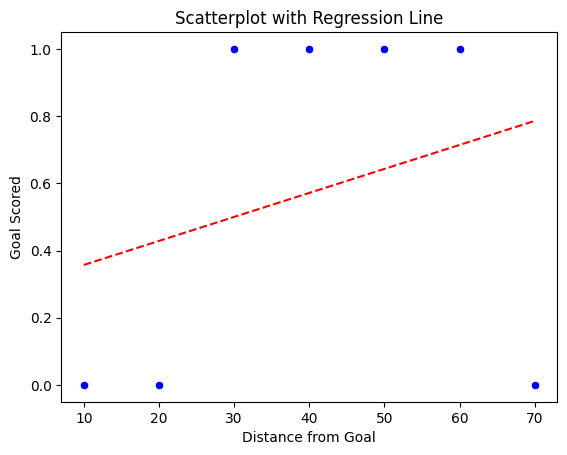

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a sample DataFrame
data = {'Distance': [10, 20, 30, 40, 50, 60, 70],
        'Goal_Scored': [0, 0, 1, 1, 1, 1, 0]}

df = pd.DataFrame(data)

# Create a scatterplot
sns.scatterplot(x='Distance', y='Goal_Scored', data=df, marker='o', color='blue')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(df['Distance'], df['Goal_Scored'])

# Plot the regression line
x_values = [min(df['Distance']), max(df['Distance'])]
y_values = [intercept + slope * x for x in x_values]
plt.plot(x_values, y_values, color='red', linestyle='dashed')

# Display regression values
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Show the plot
plt.xlabel('Distance from Goal')
plt.ylabel('Goal Scored')
plt.title('Scatterplot with Regression Line')
plt.show()


In [40]:
import pandas as pd
file_path = 'shots_2022.csv'
df_base = pd.read_csv(file_path)
description = df_base.describe()
print(description)

              shotID  arenaAdjustedShotDistance  arenaAdjustedXCord  \
count  122026.000000              122026.000000       122026.000000   
mean    61012.500000                  33.783658           -0.264345   
std     35226.016311                  19.352137           63.973502   
min         0.000000                   1.000000          -99.000000   
25%     30506.250000                  17.000000          -64.000000   
50%     61012.500000                  32.000000           -1.000000   
75%     91518.750000                  48.000000           64.000000   
max    122025.000000                  99.000000           99.000000   

       arenaAdjustedXCordABS  arenaAdjustedYCord  arenaAdjustedYCordAbs  \
count          122026.000000       122026.000000          122026.000000   
mean               61.090874            0.032518              15.483913   
std                18.988244           19.383625              11.660722   
min                 0.000000          -48.000000            


1) Take template
2) refactor methods
3) insert named tuple
4) only get data needed
5) run_it

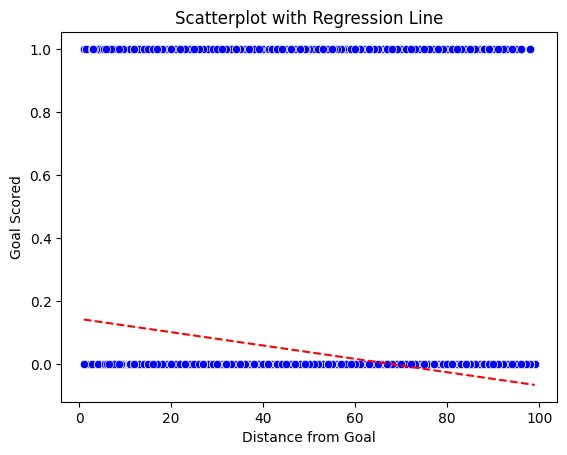

Slope: -0.002117747162715964
Intercept: 0.14352990536364146
R-squared: 0.025142438621271558
P-value: 0.0
Standard Error: 3.775012229806724e-05


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from collections import namedtuple

Regression_Result = namedtuple('Regression_Result', ['slope', 'intercept','r_value','p_value','standard_error'])

def plot_regression_line(dist_goal_df, regression_result):
    sns.scatterplot(x='distance', y='is_goal', data=dist_goal_df, marker='o', color='blue')
    x_values = [min(dist_goal_df['distance']), max(dist_goal_df['distance'])]
    y_values = [regression_result.intercept + regression_result.slope * x for x in x_values]
    plt.plot(x_values, y_values, color='red', linestyle='dashed')
    plt.xlabel('Distance from Goal')
    plt.ylabel('Goal Scored')
    plt.title('Scatterplot with Regression Line')
    plt.show()

def display_regression_values(regression_result):
    print(f"Slope: {regression_result.slope}")
    print(f"Intercept: {regression_result.intercept}")
    print(f"R-squared: {regression_result.r_value**2}")
    print(f"P-value: {regression_result.p_value}")
    print(f"Standard Error: {regression_result.standard_error}")

def run_regression(dist_goal_df):
    linregress_output = linregress(dist_goal_df['distance'], dist_goal_df['is_goal'])
    regression_result = Regression_Result._make(linregress_output)
    plot_regression_line(dist_goal_df, regression_result)
    display_regression_values(regression_result)

dist_goal_df = df_base[['arenaAdjustedShotDistance', 'goal']]
dist_goal_df = dist_goal_df.rename(columns={'arenaAdjustedShotDistance': 'distance', 'goal': 'is_goal'})
run_regression(dist_goal_df)

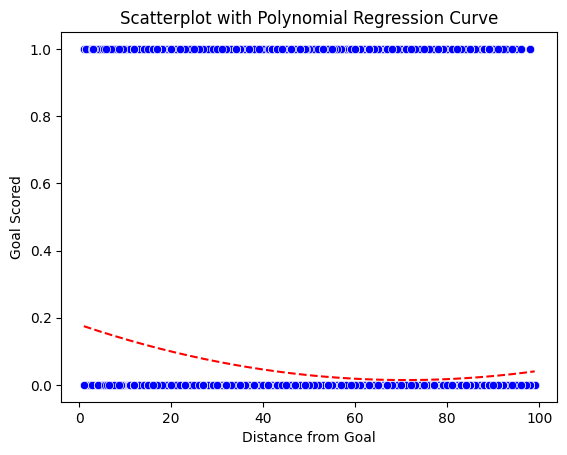

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_poly_regression(dist_goal_df):
    sns.scatterplot(x='distance', y='is_goal', data=dist_goal_df, marker='o', color='blue')
    average_predicted_goals = dist_goal_df.groupby('distance')['predicted_goals'].mean().reset_index()
    plt.plot(average_predicted_goals['distance'], average_predicted_goals['predicted_goals'], color='red', linestyle='dashed')
    plt.xlabel('Distance from Goal')
    plt.ylabel('Goal Scored')
    plt.title('Scatterplot with Polynomial Regression Curve')
    plt.show()

def run_poly_regression(dist_goal_df):
    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c
    params, covariance = curve_fit(poly_func, dist_goal_df['distance'], dist_goal_df['is_goal'])
    dist_goal_df['predicted_goals'] = poly_func(dist_goal_df['distance'], *params)
    plot_poly_regression(dist_goal_df)

dist_goal_df = df_base[['arenaAdjustedShotDistance', 'goal']]
dist_goal_df = dist_goal_df.rename(columns={'arenaAdjustedShotDistance': 'distance', 'goal': 'is_goal'})
run_poly_regression(dist_goal_df)

Optimization terminated successfully.
         Current function value: 0.244490
         Iterations 7


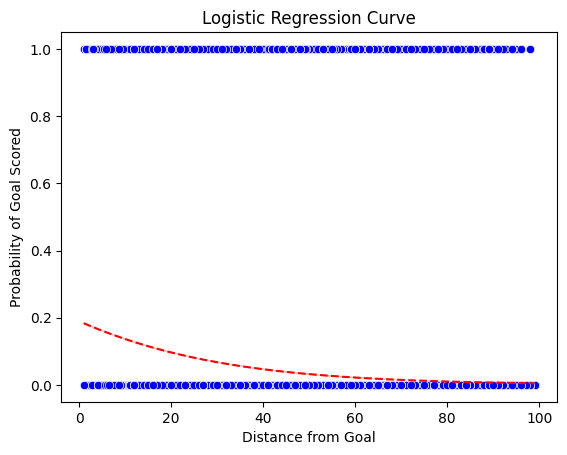

                           Logit Regression Results                           
Dep. Variable:                is_goal   No. Observations:               122026
Model:                          Logit   Df Residuals:                   122024
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Nov 2023   Pseudo R-squ.:                 0.05508
Time:                        12:05:21   Log-Likelihood:                -29834.
converged:                       True   LL-Null:                       -31573.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4538      0.020    -71.113      0.000      -1.494      -1.414
distance      -0.0391      0.001    -53.631      0.000      -0.040      -0.038


In [45]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def plot_logit_regression(dist_goal_df, logit_result):
    sns.scatterplot(x='distance', y='is_goal', data=dist_goal_df, marker='o', color='blue')
    sns.lineplot(x=dist_goal_df['distance'], y=logit_result.predict(), color='red', linestyle='dashed')
    plt.xlabel('Distance from Goal')
    plt.ylabel('Probability of Goal Scored')
    plt.title('Logistic Regression Curve')
    plt.show()

def run_logit_regression(dist_goal_df):
    dist_goal_df['const'] = 1
    X = dist_goal_df[['const', 'distance']]
    y = dist_goal_df['is_goal']
    logit_model = sm.Logit(y, X)
    logit_result = logit_model.fit()
    plot_logit_regression(dist_goal_df, logit_result)
    print(logit_result.summary())

dist_goal_df = df_base[['arenaAdjustedShotDistance', 'goal']]
dist_goal_df = dist_goal_df.rename(columns={'arenaAdjustedShotDistance': 'distance', 'goal': 'is_goal'})
run_logit_regression(dist_goal_df)

In [66]:

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

def run_multi_logit_regression(working_df):
    working_df['const'] = 1
    scaler = StandardScaler()
    working_df[['distance_scaled', 'shot_type_id_scaled']] = scaler.fit_transform(working_df[['distance', 'shot_type_id']])
    X = working_df[['const', 'distance_scaled', 'shot_type_id_scaled']]
    y = working_df['is_goal']
    logit_model = sm.Logit(y, X)
    logit_result = logit_model.fit()
    print(logit_result.summary())

def create_working_dataframe(df_base):
    # distinct_shot_types = df['shotType'].unique()
    # print(distinct_shot_types)
    working_df = df_base[['arenaAdjustedShotDistance', 'goal', 'shotType']]
    working_df = working_df.iloc[:]
    working_df['shotType'] = working_df['shotType'].fillna('UNK')
    shot_type_mapping = {'WRIST': 1, 'SLAP': 2, 'TIP': 3, 'SNAP': 4, 'BACK': 5, 'WRAP': 6, 'DEFL': 7, 'UNK': 8}
    working_df['shot_type_id'] = working_df['shotType'].map(shot_type_mapping)
    working_df = working_df.rename(columns={'arenaAdjustedShotDistance': 'distance', 'goal': 'is_goal'})
    return working_df

working_df = create_working_dataframe(df_base)
run_multi_logit_regression(working_df)

Optimization terminated successfully.
         Current function value: 0.244426
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_goal   No. Observations:               122026
Model:                          Logit   Df Residuals:                   122023
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Nov 2023   Pseudo R-squ.:                 0.05533
Time:                        12:36:35   Log-Likelihood:                -29826.
converged:                       True   LL-Null:                       -31573.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7760      0.014   -204.713      0.000      -2.803      -2.749
di